# GEOS 518: Applied Hydrologic Science
# Module 02: Autocorrelation Functions from Hydrologic Time Series

## By: Lejo Flores
## January 25, 2018

In this notebook...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Henry's fork discharge dataset
df = pd.read_pickle('HenrysForkDischarge_WY2001-2015.pkl')

# Print the first and last 10 records just to make sure we loaded the data okay
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Y,M,D,Q,SerDates
0,2000,10,1,39.361853,2000-10-01
1,2000,10,2,39.361853,2000-10-02
2,2000,10,3,37.945959,2000-10-03
3,2000,10,4,37.945959,2000-10-04
4,2000,10,5,37.379601,2000-10-05
5,2000,10,6,36.813243,2000-10-06
6,2000,10,7,37.096422,2000-10-07
7,2000,10,8,36.813243,2000-10-08
8,2000,10,9,38.512316,2000-10-09
9,2000,10,10,37.662780,2000-10-10


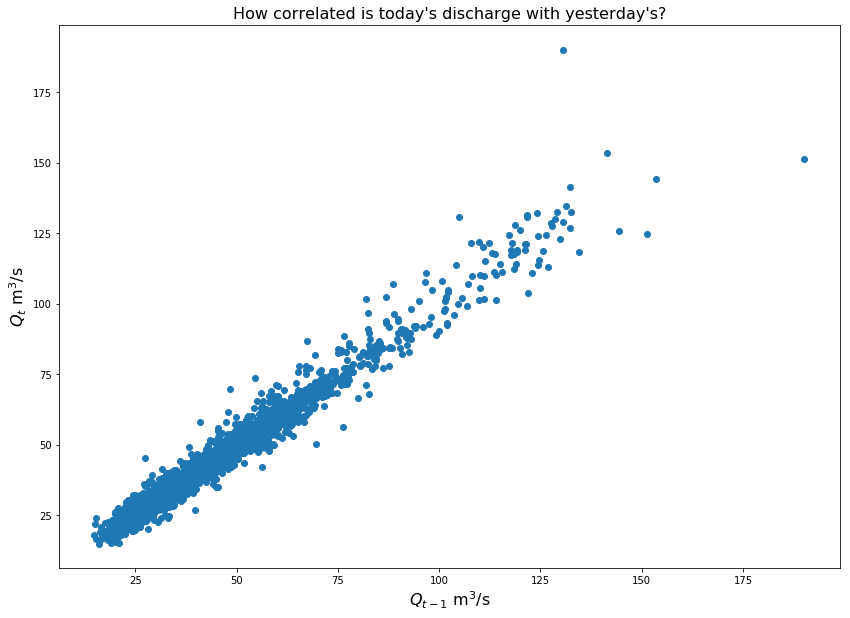

In [7]:
Q = df['Q'].values 

# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
Qt   = Q[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
Qtm1 = Q[0:-2]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Qtm1,Qt,'o')
plt.title('How correlated is today\'s discharge with yesterday\'s?',fontsize=16)
plt.xlabel('$Q_{t-1}$ m$^3$/s',fontsize=16)
plt.ylabel('$Q_t$ m$^3$/s',fontsize=16)
plt.show()


In [3]:
R = np.corrcoef(Qtm1,Qt)
R[1,0]

0.9877021859803512

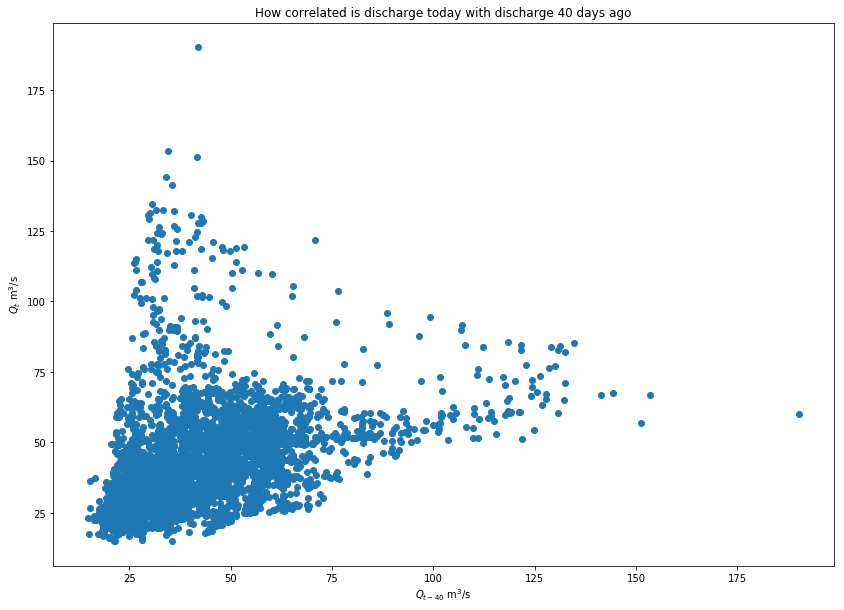

In [4]:
Qt   = Q[40:-1] 
Qtmk = Q[0:-(41)]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Qtmk,Qt,'o')
plt.title('How correlated is discharge today with discharge 40 days ago',fontsize=16)
plt.xlabel('$Q_{t-40}$ m$^3$/s',fontsize=16)
plt.ylabel('$Q_t$ m$^3$/s',fontsize=16)
plt.show()

In [5]:
R = np.corrcoef(Qtmk,Qt)
R[1,0]


0.43918957805063219

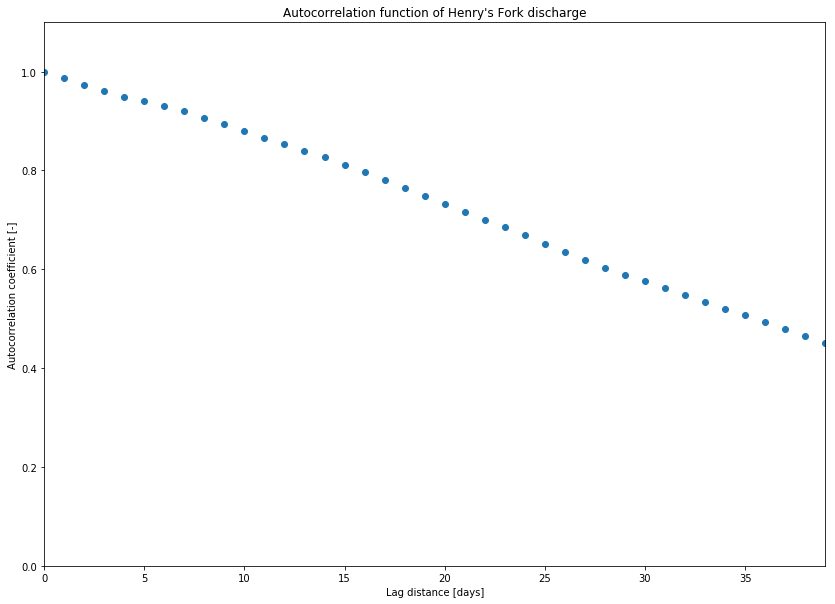

In [6]:
Nk = 40
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    Qt   = Q[k:-1] 
    Qtmk = Q[0:-(1+k)]
    R = np.corrcoef(Qtmk,Qt)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Henry\'s Fork discharge',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()
